Downloading...
From: https://drive.google.com/uc?id=1Rt6OfHWNdmoLNKfGS607nkRu--9EaAlR
To: /Users/ernestnsangalufu/NetflixData.zip
100%|████████████████████████████████████████| 984k/984k [00:00<00:00, 1.27MB/s]


Downloaded file to: NetflixData.zip
Unzipped and extracted to: Netflix_shows_movies
Loaded dataset with 6234 rows and 12 columns
Missing values before cleaning:
show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64
Missing values after cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64
Descriptive statistics:
            show_id  release_year
count  6.234000e+03    6234.00000
mean   7.670368e+07    2013.35932
std    1.094296e+07       8.81162
min    2.477470e+05    1925.00000
25%    8.003580e+07    2013.00000
50%    8.016337e+07    2016.00000
75%    8.024489e+07    2018.00000
max    8.123573e+0

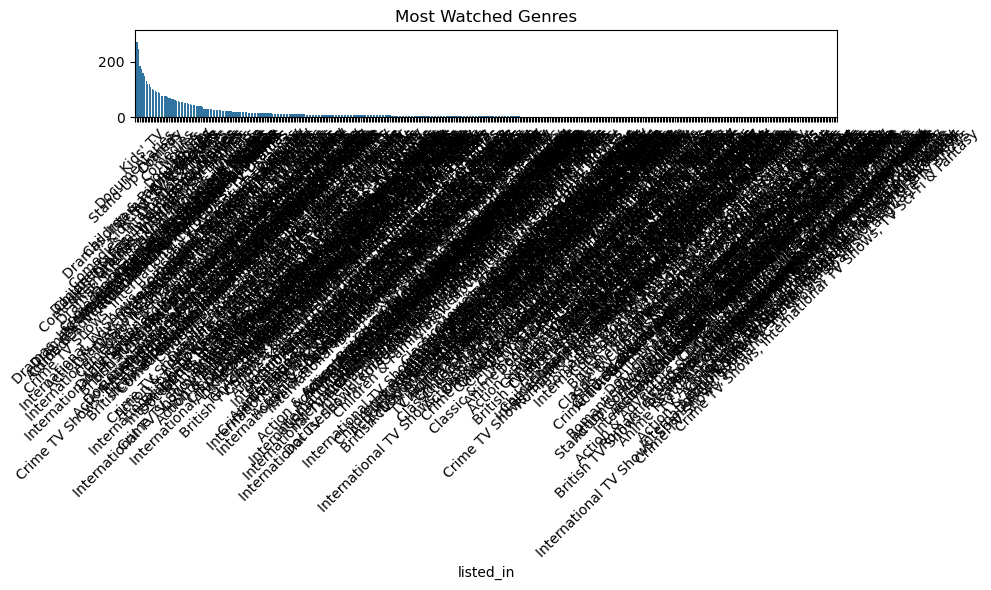

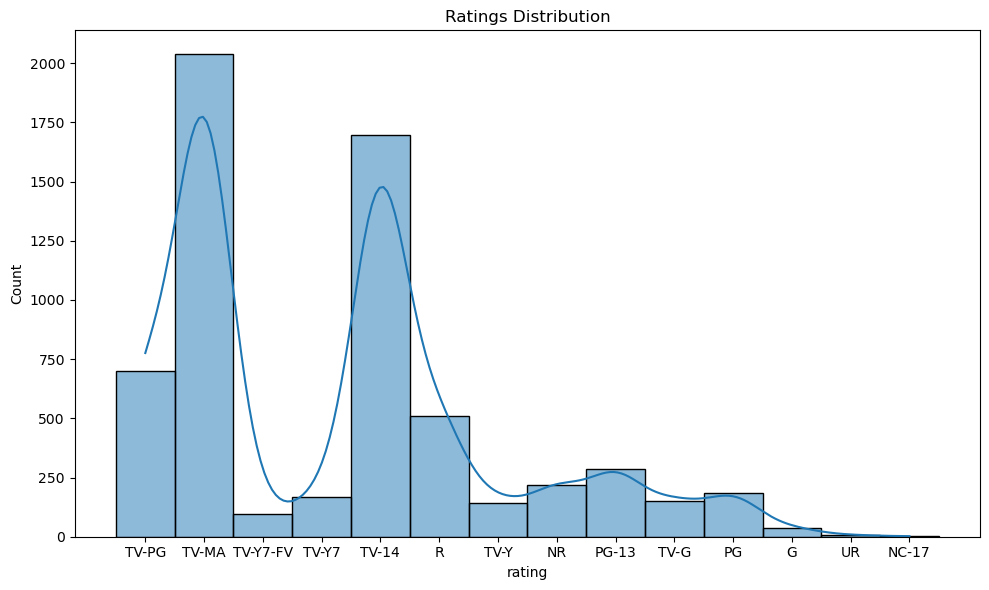

Cleaned dataset exported to cleaned_Netflix_shows_movies.csv for R analysis


In [21]:
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

# 1. Downloading the file from Google Drive
def download_from_google_drive(file_id, output):
    # Construct the download URL
    drive_url = f"https://drive.google.com/uc?id={file_id}"
    gdown.download(drive_url, output, quiet=False)
    print(f"Downloaded file to: {output}")

# 2. Unzipping the dataset and renaming it
def unzip_dataset(zip_file_path, extract_to):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Unzipped and extracted to: {extract_to}")

# 3. Loading and inspecting the dataset
def load_dataset(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Loaded dataset with {df.shape[0]} rows and {df.shape[1]} columns")
        return df
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None

# 4. Data Cleaning - Handling missing values
def clean_data(df):
    print("Missing values before cleaning:")
    print(df.isnull().sum())

    # Filling missing categorical values with mode and numeric with mean
    for col in df.columns:
        if df[col].dtype == 'object':
            # Replace the column with the filled values instead of using inplace
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].mean())

    print("Missing values after cleaning:")
    print(df.isnull().sum())
    return df

# 5. Data Exploration - Descriptive statistics
def explore_data(df):
    print("Descriptive statistics:")
    print(df.describe())

# 6. Data Visualization - Most watched genres and ratings distribution
def visualize_data(df, genre_column, rating_column):
    # Most Watched Genres
    genre_counts = df[genre_column].value_counts()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=genre_counts.index, y=genre_counts.values)
    plt.title('Most Watched Genres')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Ratings Distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df[rating_column], kde=True)
    plt.title('Ratings Distribution')
    plt.tight_layout()
    plt.show()

# 7. Export cleaned data for R usage
def export_for_r(df, export_path):
    df.to_csv(export_path, index=False)
    print(f"Cleaned dataset exported to {export_path} for R analysis")

# Main Execution Flow
if __name__ == "__main__":
    # Google Drive file ID
    file_id = '1Rt6OfHWNdmoLNKfGS607nkRu--9EaAlR'  # The file ID from the Google Drive link
    zip_file = 'NetflixData.zip'  # Name for the downloaded file
    extract_folder = 'Netflix_shows_movies'
    csv_file = os.path.join(extract_folder, 'netflix_data.csv')  # Change this based on your actual CSV name

    # Step 1: Download from Google Drive
    download_from_google_drive(file_id, zip_file)

    # Step 2: Unzipping
    unzip_dataset(zip_file, extract_folder)

    # Step 3: Load Dataset
    df = load_dataset(csv_file)

    if df is not None:
        # Step 4: Clean Data
        df_cleaned = clean_data(df)

        # Step 5: Data Exploration
        explore_data(df_cleaned)

        # Step 6: Visualize Data
        genre_column = 'listed_in'  # Updated to 'listed_in' for genre
        rating_column = 'rating'  # Ensure this is the correct column for ratings
        visualize_data(df_cleaned, genre_column, rating_column)

        # Step 7: Export for R integration
        export_for_r(df_cleaned, 'cleaned_Netflix_shows_movies.csv')
